In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

### read data

In [15]:
stocks = pd.read_csv("data/SPY_daily.csv")

In [5]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.453930,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.642057,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.698507,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.980742,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.093624,531500


In [7]:
sample = stocks.iloc[0:100]
fig = go.Figure(data=[go.Candlestick(x=sample['Date'],
                open=sample['Open'],
                high=sample['High'],
                low=sample['Low'],
                close=sample['Close'])],
               )

fig.show()

### engineer features

In [16]:
stocks['high_adj'] = (stocks['High'] - stocks['Close']) / stocks['Close']
stocks['low_adj'] = (stocks['Low'] - stocks['Close']) / stocks['Close']
stocks['body'] = (stocks['Close'] - stocks['Open']) / stocks['Open']
stocks['close_prev'] = stocks['Close'].shift(1)
stocks = stocks.iloc[1:]
stocks['change'] = (stocks['Close'] - stocks['close_prev']) / stocks['close_prev']

In [17]:
stocks.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,high_adj,low_adj,body,close_prev,change
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.642057,480500,0.000000,-0.006356,0.006397,43.93750,0.007112
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.698507,201300,0.000705,-0.004933,0.002827,44.25000,0.002119
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.980742,529400,0.000697,-0.009763,0.009148,44.34375,0.010571
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.093624,531500,0.002083,-0.011806,0.000695,44.81250,0.004184
5,1993-02-05,44.96875,45.06250,44.71875,44.96875,27.074818,492100,0.002085,-0.005559,0.000000,45.00000,-0.000694
6,1993-02-08,44.96875,45.12500,44.90625,44.96875,27.074818,596100,0.003475,-0.001390,0.000000,44.96875,0.000000
7,1993-02-09,44.81250,44.81250,44.56250,44.65625,26.886669,122100,0.003499,-0.002099,-0.003487,44.96875,-0.006949
8,1993-02-10,44.65625,44.75000,44.53125,44.71875,26.924292,379600,0.000699,-0.004193,0.001400,44.65625,0.001400
9,1993-02-11,44.78125,45.12500,44.78125,44.93750,27.055990,19500,0.004172,-0.003477,0.003489,44.71875,0.004892
10,1993-02-12,44.87500,44.87500,44.59375,44.59375,26.849037,42500,0.006307,0.000000,-0.006267,44.93750,-0.007650


### explore data

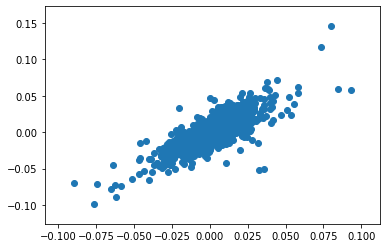

In [25]:
plt.scatter(stocks['body'], stocks['change'])

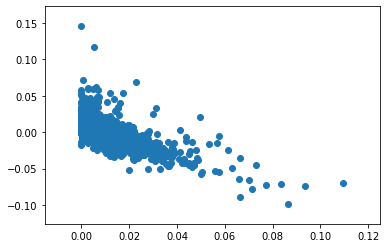

In [26]:
plt.scatter(stocks['high_adj'], stocks['change'])

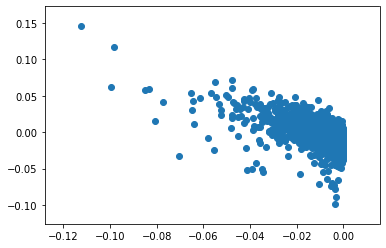

In [18]:
plt.scatter(stocks['low_adj'], stocks['change'])

(array([1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 8.000e+00,
        1.600e+01, 1.900e+01, 8.400e+01, 2.350e+02, 5.800e+02, 1.775e+03,
        2.676e+03, 9.690e+02, 2.640e+02, 6.900e+01, 4.000e+01, 1.700e+01,
        8.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.09844768, -0.09032617, -0.08220466, -0.07408314, -0.06596163,
        -0.05784012, -0.0497186 , -0.04159709, -0.03347558, -0.02535406,
        -0.01723255, -0.00911104, -0.00098952,  0.00713199,  0.0152535 ,
         0.02337502,  0.03149653,  0.03961804,  0.04773956,  0.05586107,
         0.06398258,  0.0721041 ,  0.08022561,  0.08834712,  0.09646864,
         0.10459015,  0.11271166,  0.12083318,  0.12895469,  0.1370762 ,
         0.14519772]),
 <a list of 30 Patch objects>)

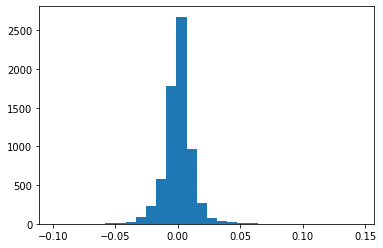

In [19]:
plt.hist(stocks['change'], bins=30)

### clustering

In [20]:
data = stocks[['high_adj', 'low_adj', 'body', 'change']]
data = data.to_numpy()
data = StandardScaler().fit_transform(data)

n_clusters = 8
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=16, random_state=1)
kmeans.fit(data)
labels = kmeans.labels_
stocks['cluster'] = labels

In [21]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,high_adj,low_adj,body,close_prev,change,cluster
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.642057,480500,0.000000,-0.006356,0.006397,43.93750,0.007112,1
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.698507,201300,0.000705,-0.004933,0.002827,44.25000,0.002119,3
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.980742,529400,0.000697,-0.009763,0.009148,44.34375,0.010571,1
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.093624,531500,0.002083,-0.011806,0.000695,44.81250,0.004184,1
5,1993-02-05,44.96875,45.06250,44.71875,44.96875,27.074818,492100,0.002085,-0.005559,0.000000,45.00000,-0.000694,3


(array([1559., 1338.,  253.,    0., 2536.,   39.,    0.,  695.,   20.,
         339.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

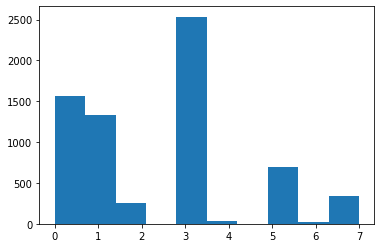

In [22]:
plt.hist(stocks['cluster'])

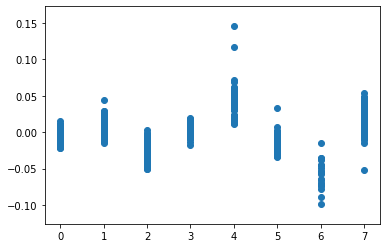

In [23]:
plt.scatter(stocks['cluster'], stocks['change'])

In [27]:
cluster_results = stocks.groupby('cluster')[['change', 'high_adj', 'low_adj', 'body']].mean()
cluster_results.head(n_clusters)

,change,high_adj,low_adj,body
cluster,,,,
0,-0.004128,0.007448,-0.003556,-0.003985
1,0.008755,0.002258,-0.011552,0.007282
2,-0.024376,0.028827,-0.004471,-0.020881
3,0.001977,0.002397,-0.004393,0.001323
4,0.045431,0.005192,-0.056764,0.042322
5,-0.012669,0.015735,-0.003062,-0.011425
6,-0.058382,0.067053,-0.007806,-0.051479
7,0.019208,0.003277,-0.023542,0.017406


In [ ]:

fig = go.Figure(data=[go.Candlestick(x=sample['Date'].iloc[0:n_clusters],
                open=sample['Open'],
                high=sample['High'],
                low=sample['Low'],
                close=sample['Close'])])

fig.show()

In [31]:
cluster_results.iloc[0]

change     -0.004128
high_adj    0.007448
low_adj    -0.003556
body       -0.003985
Name: 0, dtype: float64

In [32]:
import plotly.graph_objects as go
from datetime import datetime

open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data)])

fig.show()